In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

{'rho = 0.85': [5.666666666666666, 2.603603603603603, 1.6230591344565575, 1.1488603694686306, 0.872626692651436, 0.6933890435584767, 0.5685563386527455, 0.47714077751243356, 0.4076400140963214, 0.3532408700772689, 0.3096605691224644, 0.2740773587867885, 0.24455978263160505, 0.21974331757154048, 0.19863794404773086, 0.18050883011093605, 0.16479972082667996, 0.15108224694436606, 0.13902149468369965], 'rho = 0.9': [9.000000000000002, 4.2631578947368425, 2.7235367372353676, 1.9693831607384065, 1.5249864414658718, 1.2335428338038494, 1.028510418806498, 0.8769162376828216, 0.7605945826614564, 0.6687315241076971, 0.5944967364135759, 0.5333690942522112, 0.4822399985988282, 0.43890367091269944, 0.40175286705307056, 0.3695896211702437, 0.3415033611014279, 0.3167900224829569, 0.2948969512916245], 'rho = 0.95': [18.999999999999982, 9.256410256410247, 6.046723479282979, 4.4570949758883645, 3.511196098700934, 2.885295991380698, 2.441292020288904, 2.1104215765242076, 1.8546310609769847, 1.65117115625

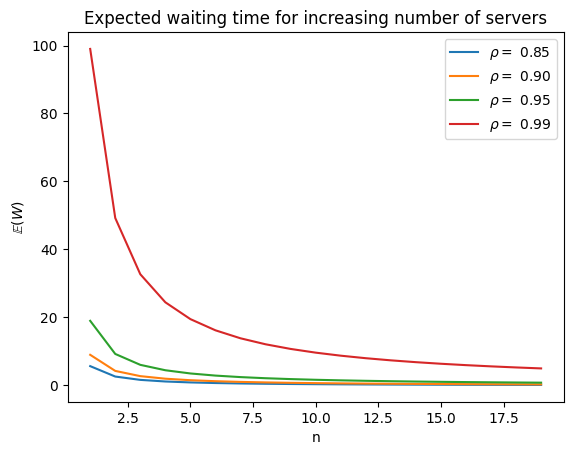

In [64]:
def summation(n, rho):
    result = 0

    for i in range(n):
        S = (((n * rho) ** i) / math.factorial(i))

        result += S
        
    return result

def delay_probability(n, rho):
    pi = (((n * rho)**n)/math.factorial(n))*(1/(((1-rho)*summation(n, rho)) + ((n * rho) ** n)/ math.factorial(n)))
    return pi

def waiting_time(n, rho, mu):
    W = delay_probability(n, rho)* (1/(1 - rho))*(1/n*mu)
    return W

rho_waiting_times = {}
rho_values = [0.85, 0.9, 0.95, 0.99]

for rho in rho_values:
    waiting_time_list = []
    for n in range(1,20):
        waiting_time_list.append(waiting_time(n, rho, 1))
    rho_waiting_times[f'rho = {rho}'] = waiting_time_list
print(rho_waiting_times)
for rho in rho_values:
    waiting_time_list = rho_waiting_times[f'rho = {rho}']
    plt.plot(range(1,20), waiting_time_list, label=r'$\rho =$ %.2f'%(rho))
plt.title('Expected waiting time for increasing number of servers')
plt.ylabel(r'$\mathbb{E}(W)$')
plt.xlabel('n')
plt.legend()
plt.show()



{'n = 1': [0.11111111111111112, 0.25, 0.42857142857142866, 0.6666666666666667, 1.0, 1.5, 2.333333333333334, 4.000000000000001, 9.000000000000002, 98.99999999999991], 'n = 2': [0.002506265664160402, 0.010101010101010104, 0.023017902813299244, 0.04166666666666667, 0.06666666666666667, 0.09890109890109892, 0.13960113960113965, 0.1904761904761905, 0.2539184952978057, 0.32454717043610715], 'n = 4': [9.914939732038844e-07, 1.511967220550659e-05, 7.305333163777454e-05, 0.00022067747986318002, 0.0005157297576070139, 0.001025329434549804, 0.0018242753994828819, 0.0029940119760479052, 0.0046221835220319855, 0.006556995938028376]}


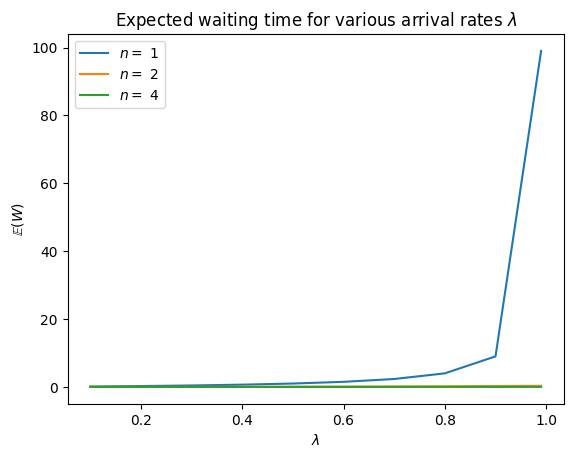

In [72]:
def rho(n, arrival_rate, mu):
    r = arrival_rate/(n*mu)
    return r

arrival_rate_list = list(np.arange(0.1,0.91,0.1))
arrival_rate_list.append(0.99)
mu = 1
n_values = [1,2,4]

n_waiting_times = {}

for n in n_values:
    waiting_time_list = []
    for arrival_rate in arrival_rate_list:
        rho_value = rho(n, arrival_rate, mu)
        waiting_time_list.append(waiting_time(n, rho_value, 1))
    n_waiting_times[f'n = {n}'] = waiting_time_list
print(n_waiting_times)

for n in n_values:
    waiting_time_list = n_waiting_times[f'n = {n}']
    plt.plot(arrival_rate_list, waiting_time_list, label=r'$n =$ %i'%(n))
plt.title(r'Expected waiting time for various arrival rates $\lambda$')
plt.ylabel(r'$\mathbb{E}(W)$')
plt.xlabel(r'$\lambda$')
plt.legend()
plt.show()
